# Assignment 3: Generative Adversarial Networks for X-RAY Classification

The [MedMNIST v2 dataset](https://medmnist.com/) is the MNIST of Medical Imaging containing a large-scale MNIST-like collection of standardized biomedical images.

Can we use this dataset to generate additional synthetic images? Can we condition the data generation on a label? 

Let's try this in this exercise!

## Exercise:


#### 1. Definition of Research Question
We propose to explore one of the MedMNIST datasets and and define a suitable research question. This research question should contain GANs in its hypothesis and aiming towards solving a useful clinical task. Note: Normally, one would also look up the literature to see if the research question is already answered. For now, we skip this step

#### 2. Definition of a Baseline for the Research Question
To test our hypothesis, we need to gather experimental data to compare our solution against the state-of-the-art. The state-of-the-art is our baseline method.

#### 3. Implementation of the Baseline
We implement the baseline and try to do so making our code reusable for our method  (e.g. dataloaders, downstream classifer).  

#### 4. Testing the Baseline and Storage of Results
Now, we test out our baseline implementation and gather the corresponding empirical results and observe its results on our target performance metrics. Can these results be improved upon? Or, can similar results be aachieved with our more e.g. privacy-preserving, interpretable, generalizable, simpler, or more environment friendly solution?

#### 5. Implementation of our GAN Method
The method we hypothesise for the clinical task at hand would need to be implemented to allow testing its usefulness. 

#### 6. Test of our GAN Method and Storage of Results
Now is the time to observe whether our method/intervention yields useful results, as we can readily compare it to our  baseline. 

#### 7. Comparison of our Method and Baseline, Interpretation of Results
Now that we have generated some experimental data, we can interpret our results and clearly demonstrate whether our method was useful for the clinical task. We can now reject or accept our hypothesis.

#### 8. Reflective Account
What could be the reasons why our study did or did not succeed? What do you think are the limitations of our study? What can we learn and takeaway from this exercise? How should it inform our future work? What are the next things to try?

# 1. Definition of a Research question


### Review of MedMNIST Datasets

The MedMNIST dataset including 12 datasets for 2D and 6 datasets for 3D, in total containing 708,069 2D images and 10,214 3D images. The dataset is pre-processed into 28 x 28 (2D) or 28 x 28 x 28 (3D) images alongside the corresponding classification labels for diverse classification tasks (binary/multi-class, ordinal regression and multi-label). More information can be found in the [MedMNIST homepage](https://medmnist.com/).


### Choice of PneumoniaMNIST Dataset for our Study

We propose to use the PneumoniaMNIST dataset from MedMNIST, which contains to 5,856 chest x-rays (train: 4,708, validation: 524, test: 624). The reason for choosing this dataset is that its respective image classification task is binary (pneumonia/normal). Binary classification is likely to be simpler than multi-class classification for data augmentation purposes i.e. only two rather than multiple class-conditioned images need to be generated.
More information on the source of the Pneumonia dataset can be found [here](https://www.sciencedirect.com/science/article/pii/S0092867418301545).


### Definition of our Research Question

We follow the clinical task defined by the dataset providers, which is the classification of resampled chest xrays to diagnose lung pneumonia.

In this regard, our objective would be to maximize the performance of the classifier on the test dataset that should, in theory, resemble the real world distribution if we'd deploy our classifer into a clinical setting. 

Now, we could train a GAN to augment the classfier's training data, which might improve classification performance.

However, the [reported performance](https://medmnist.com/) is already quite strong: 

**ResNet-18: AUC: 0.944, ACC: 0.854**

There seems to be not that much to gain with GAN-based data augmentation (*Note: You may still try if you like*). 

On the other hand, privacy preservation is a topic of immense importance in medical imaging. The pneumonia chest scans are from a pediatric patient cohort that paticularly requires special data protection. We could train a GAN to generate a synthetic dataset that would likely need less privacy protection than the real data. 

*Note: Feel free to checkout the related topic of [differential privacy](https://ai.googleblog.com/2022/02/applying-differential-privacy-to-large.html) that provides a guarantee of privacy, among others, in neural networks.*

In this sense, we can now define our hypothesis:

**H1: Could we, instead of using real patient data, use only synthetic data to train our classifier and achieve comparable performance?**

# 2. Definition of a Baseline for the Research Question


##### We can now define our baseline metrics: 
For example, a ResNet-18 trained on the real training dataset achieved AUC: 0.944 and ACC: 0.854 

##### We define our method: 
A simple CNN trained on a GAN-generated synthetic training dataset.

You are free to change the CNN model and use another architecture (e.g.,[see baseline](https://medmnist.com/))

##### How do we create the GAN-generated dataset?
Feel free to explore any idea you have. You may try out different (un)conditional GAN architectures and loss functions. Further below you will find some optional guidance.

# 3. Implementation of the Baseline

### Getting the Data
As always, you need access to the dataset. In this case you can download the pneumoniamnist.npz from [Zenodo](https://zenodo.org/record/5208230#.YmcLxtNBz0o). However, note that you can also access medMNIST data via the python packaging index ([pip](https://pypi.org/project/medmnist/)) or [Github](https://github.com/MedMNIST/MedMNIST) directly as pytorch dataset class.

For example:

In [1]:
!pip3 install medmnist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 537.9 kB/s eta 0:00:00 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114248 sha256=396d6da377e7fdcfb2c691996b4a5edc3c6e8a45a70a164fd4c564641bf32785
  Stored in directory: /Users/irisvuko/Library/Caches/pip/wheels/9e/5b/45/29f72e55d87a29426b04b3cfdf20325c079eb97ab74f59017d
Successfully built fire


In [2]:
import medmnist
from medmnist import INFO, Evaluator
info = INFO['pneumoniamnist']
DataClass = getattr(medmnist, info['python_class'])

task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

Let's further explore the dataset. We can start by printing dataset info and checking the label distribution.

In [3]:
# Download the dataset
train_dataset = DataClass(split='train', download=True)

# Print dataset information
print(train_dataset)

100%|██████████| 4170669/4170669 [00:02<00:00, 1449628.34it/s]

Dataset PneumoniaMNIST of size 28 (pneumoniamnist)
    Number of datapoints: 4708
    Root location: /Users/irisvuko/.medmnist
    Split: train
    Task: binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'normal', '1': 'pneumonia'}
    Number of samples: {'train': 4708, 'val': 524, 'test': 624}
    Description: The PneumoniaMNIST is based on a prior dataset of 5,856 pediatric chest X-Ray images. The task is binary-class classification of pneumonia against normal. We split the source training set with a ratio of 9:1 into training and validation set and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384−2,916)×(127−2,713). We center-crop the images and resize them into 1×28×28.
    License: CC BY 4.0


In [4]:
from collections import Counter

# Check the training label distribution
train_classes = [float(label) for _, label in train_dataset]
print (dict(Counter(train_classes)))

{1.0: 3494, 0.0: 1214}


/var/folders/ph/hryvf5m94jx0bs4j7nxpwrfr0000gn/T/ipykernel_8292/3206429814.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  train_classes = [float(label) for _, label in train_dataset]


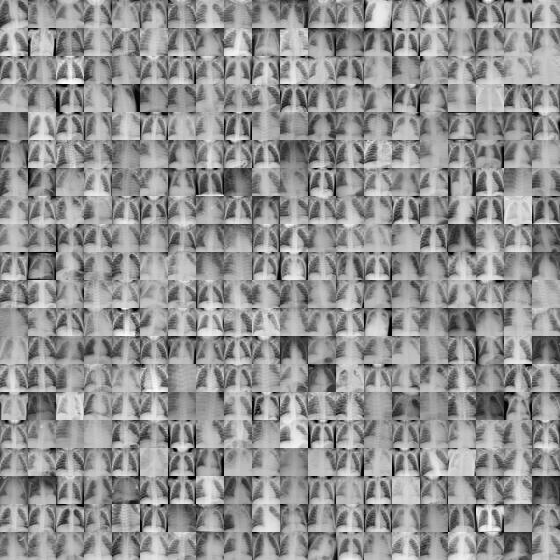

In [5]:
# Let's have a look at some of the training images.
train_dataset.montage(length=20)

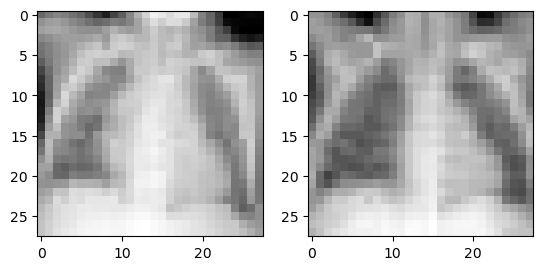

In [6]:
# Let's visually compare pneumial vs. healthy thoraic xray
# 0: pneumonia, 1: normal
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)
ax[0].imshow(train_dataset[0][0], cmap='gray') # pneumonia
ax[1].imshow(train_dataset[200][0],cmap='gray') # normal

### Baseline Model Implementation
To implement the baseline, we start with the [medMNIST github](https://github.com/MedMNIST/MedMNIST), where we can find a [Pytorch getting started notebook](https://github.com/MedMNIST/MedMNIST/blob/main/examples/getting_started.ipynb).

In [9]:
# We define a simple CNN model for pneumonia classification
from torch import nn

class Net(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(Net, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels, 16, kernel_size=3),
            nn.BatchNorm2d(16),
            nn.ReLU())

        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer3 = nn.Sequential(
            nn.Conv2d(16, 64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU())
        
        self.layer4 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU())

        self.layer5 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.fc = nn.Sequential(
            nn.Linear(64 * 4 * 4, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes-1)) # -1 if we use binary CLF

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

Initialization of model, criterion and optimizer

In [10]:
from torch import optim

lr = 0.001

model_base = Net(in_channels=n_channels, num_classes=n_classes)
    
# define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
    
optimizer = optim.SGD(model_base.parameters(), lr=lr, momentum=0.9)


# 4. Testing the Baseline and Storage of Results


Defining hyperparameters and splitting of the dataset into test, validation, train.

In [11]:
data_flag = 'pneumoniamnist'
download = True  #  set to False if already loaded

NUM_EPOCHS = 5
BATCH_SIZE = 128
#lr = 0.001

info = INFO[data_flag]
#task = info['task']
#n_channels = info['n_channels']
#n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

In [12]:
from torchvision import transforms, utils
from torch.utils.data import DataLoader, Dataset

# preprocessing
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

# load the data
train_dataset = DataClass(split='train', transform=data_transform, download=download)
val_dataset = DataClass(split='val', transform=data_transform, download=download)
test_dataset = DataClass(split='test', transform=data_transform, download=download)

# ingest torch datasets data into torch dataloader
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
train_loader_at_eval = DataLoader(dataset=train_dataset, batch_size=2*BATCH_SIZE, shuffle=False)
val_loader = DataLoader(dataset=val_dataset, batch_size=2*BATCH_SIZE, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=2*BATCH_SIZE, shuffle=False)

Using downloaded and verified file: /Users/irisvuko/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /Users/irisvuko/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /Users/irisvuko/.medmnist/pneumoniamnist.npz


Defining evaluation metrics such as the area under the receiver operating characteristic curve (AUROC) and the accuracy (ACC).

In [13]:
def getAUC(y_true, y_score, task):
    '''AUC metric.
    :param y_true: the ground truth labels, shape: (n_samples, n_labels) or (n_samples,) if n_labels==1
    :param y_score: the predicted score of each class,
    shape: (n_samples, n_labels) or (n_samples, n_classes) or (n_samples,) if n_labels==1 or n_classes==1
    :param task: the task of current dataset
    '''
    y_true = y_true.squeeze()
    y_score = y_score.squeeze()

    if task == 'multi-label, binary-class':
        auc = 0
        for i in range(y_score.shape[1]):
            label_auc = roc_auc_score(y_true[:, i], y_score[:, i])
            auc += label_auc
        ret = auc / y_score.shape[1]
    elif task == 'binary-class':
        if y_score.ndim == 2:
            y_score = y_score[:, -1]
        else:
            assert y_score.ndim == 1
        ret = roc_auc_score(y_true, y_score)
    else:
        auc = 0
        for i in range(y_score.shape[1]):
            y_true_binary = (y_true == i).astype(float)
            y_score_binary = y_score[:, i]
            auc += roc_auc_score(y_true_binary, y_score_binary)
        ret = auc / y_score.shape[1]

    return ret

def getACC(y_true, y_score, task, threshold=0.5):
    '''Accuracy metric.
    :param y_true: the ground truth labels, shape: (n_samples, n_labels) or (n_samples,) if n_labels==1
    :param y_score: the predicted score of each class,
    shape: (n_samples, n_labels) or (n_samples, n_classes) or (n_samples,) if n_labels==1 or n_classes==1
    :param task: the task of current dataset
    :param threshold: the threshold for multilabel and binary-class tasks
    '''
    y_true = y_true.squeeze()
    y_score = y_score.squeeze()

    if task == 'multi-label, binary-class':
        y_pre = y_score > threshold
        acc = 0
        for label in range(y_true.shape[1]):
            label_acc = accuracy_score(y_true[:, label], y_pre[:, label])
            acc += label_acc
        ret = acc / y_true.shape[1]
    elif task == 'binary-class':
        if y_score.ndim == 2:
            y_score = y_score[:, -1]
        else:
            assert y_score.ndim == 1
        ret = accuracy_score(y_true, y_score > threshold)
    else:
        ret = accuracy_score(y_true, np.argmax(y_score, axis=-1))

    return ret

Training the baseline pneumonia classification model.

In [14]:
from tqdm import tqdm

for epoch in range(NUM_EPOCHS):
    train_correct = 0
    train_total = 0
    test_correct = 0
    test_total = 0
    
    model_base.train()
    for inputs, targets in tqdm(train_loader):
        # forward + backward + optimize
        optimizer.zero_grad()
        outputs = model_base(inputs)
        
        targets = targets.float()
        outputs = outputs.float()

        print(targets.shape)
        print(outputs.shape)
        loss = criterion(outputs, targets)
        
        loss.backward()
        optimizer.step()

  0%|          | 0/37 [00:00<?, ?it/s]

torch.Size([128, 1])
torch.Size([128, 1])


  3%|▎         | 1/37 [00:00<00:15,  2.28it/s]

torch.Size([128, 1])
torch.Size([128, 1])


  8%|▊         | 3/37 [00:01<00:21,  1.56it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 11%|█         | 4/37 [00:02<00:16,  1.95it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 14%|█▎        | 5/37 [00:02<00:13,  2.32it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 16%|█▌        | 6/37 [00:02<00:11,  2.66it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 19%|█▉        | 7/37 [00:03<00:10,  2.88it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 22%|██▏       | 8/37 [00:03<00:09,  3.06it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 24%|██▍       | 9/37 [00:03<00:10,  2.77it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 27%|██▋       | 10/37 [00:04<00:09,  2.96it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 30%|██▉       | 11/37 [00:04<00:08,  3.10it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 32%|███▏      | 12/37 [00:04<00:07,  3.22it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 35%|███▌      | 13/37 [00:04<00:07,  3.30it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 38%|███▊      | 14/37 [00:05<00:06,  3.39it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 41%|████      | 15/37 [00:05<00:06,  3.33it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 43%|████▎     | 16/37 [00:06<00:07,  2.89it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 46%|████▌     | 17/37 [00:06<00:06,  3.10it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 49%|████▊     | 18/37 [00:06<00:05,  3.28it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 51%|█████▏    | 19/37 [00:06<00:05,  3.43it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 54%|█████▍    | 20/37 [00:07<00:04,  3.43it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 57%|█████▋    | 21/37 [00:07<00:04,  3.55it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 59%|█████▉    | 22/37 [00:07<00:04,  3.55it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 62%|██████▏   | 23/37 [00:08<00:04,  3.05it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 65%|██████▍   | 24/37 [00:08<00:04,  3.08it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 68%|██████▊   | 25/37 [00:08<00:03,  3.28it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 70%|███████   | 26/37 [00:08<00:03,  3.35it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 73%|███████▎  | 27/37 [00:09<00:02,  3.54it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 76%|███████▌  | 28/37 [00:09<00:02,  3.55it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 78%|███████▊  | 29/37 [00:09<00:02,  3.60it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 81%|████████  | 30/37 [00:10<00:02,  3.13it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 84%|████████▍ | 31/37 [00:10<00:01,  3.30it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 86%|████████▋ | 32/37 [00:10<00:01,  3.42it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 89%|████████▉ | 33/37 [00:10<00:01,  3.56it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 92%|█████████▏| 34/37 [00:11<00:00,  3.44it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 95%|█████████▍| 35/37 [00:11<00:00,  3.55it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 97%|█████████▋| 36/37 [00:11<00:00,  3.62it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([100, 1])
torch.Size([100, 1])


  3%|▎         | 1/37 [00:00<00:08,  4.38it/s]

torch.Size([128, 1])
torch.Size([128, 1])


  5%|▌         | 2/37 [00:00<00:09,  3.73it/s]

torch.Size([128, 1])
torch.Size([128, 1])


  8%|▊         | 3/37 [00:00<00:09,  3.65it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 11%|█         | 4/37 [00:01<00:08,  3.82it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 14%|█▎        | 5/37 [00:01<00:08,  3.92it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 16%|█▌        | 6/37 [00:01<00:08,  3.69it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 19%|█▉        | 7/37 [00:01<00:07,  3.76it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 22%|██▏       | 8/37 [00:02<00:08,  3.23it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 24%|██▍       | 9/37 [00:02<00:08,  3.40it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 27%|██▋       | 10/37 [00:02<00:07,  3.50it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 30%|██▉       | 11/37 [00:03<00:07,  3.60it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 32%|███▏      | 12/37 [00:03<00:06,  3.67it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 35%|███▌      | 13/37 [00:03<00:06,  3.71it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 38%|███▊      | 14/37 [00:03<00:07,  3.22it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 41%|████      | 15/37 [00:04<00:06,  3.39it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 43%|████▎     | 16/37 [00:04<00:06,  3.45it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 46%|████▌     | 17/37 [00:04<00:05,  3.54it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 49%|████▊     | 18/37 [00:05<00:05,  3.63it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 54%|█████▍    | 20/37 [00:05<00:05,  3.07it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 57%|█████▋    | 21/37 [00:06<00:04,  3.35it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 59%|█████▉    | 22/37 [00:06<00:04,  3.04it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 62%|██████▏   | 23/37 [00:06<00:04,  3.29it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 65%|██████▍   | 24/37 [00:06<00:03,  3.44it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 68%|██████▊   | 25/37 [00:07<00:03,  3.60it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 70%|███████   | 26/37 [00:07<00:02,  3.71it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 73%|███████▎  | 27/37 [00:07<00:02,  3.68it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 76%|███████▌  | 28/37 [00:07<00:02,  3.73it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 78%|███████▊  | 29/37 [00:08<00:02,  3.27it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 81%|████████  | 30/37 [00:08<00:02,  3.45it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 84%|████████▍ | 31/37 [00:08<00:01,  3.60it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 86%|████████▋ | 32/37 [00:09<00:01,  3.70it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 89%|████████▉ | 33/37 [00:09<00:01,  3.49it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 92%|█████████▏| 34/37 [00:09<00:00,  3.56it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 95%|█████████▍| 35/37 [00:09<00:00,  3.67it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 97%|█████████▋| 36/37 [00:10<00:00,  3.22it/s]

torch.Size([128, 1])
torch.Size([128, 1])


100%|██████████| 37/37 [00:10<00:00,  3.49it/s]


torch.Size([100, 1])
torch.Size([100, 1])


  3%|▎         | 1/37 [00:00<00:10,  3.35it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


  8%|▊         | 3/37 [00:00<00:08,  4.24it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 14%|█▎        | 5/37 [00:01<00:11,  2.88it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 16%|█▌        | 6/37 [00:01<00:09,  3.30it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 19%|█▉        | 7/37 [00:02<00:10,  2.95it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 22%|██▏       | 8/37 [00:02<00:09,  3.20it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 24%|██▍       | 9/37 [00:02<00:08,  3.44it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 27%|██▋       | 10/37 [00:02<00:07,  3.60it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 30%|██▉       | 11/37 [00:03<00:07,  3.70it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 32%|███▏      | 12/37 [00:03<00:06,  3.71it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 35%|███▌      | 13/37 [00:03<00:06,  3.74it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 38%|███▊      | 14/37 [00:04<00:07,  3.26it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 41%|████      | 15/37 [00:04<00:06,  3.38it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 43%|████▎     | 16/37 [00:04<00:06,  3.31it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 46%|████▌     | 17/37 [00:04<00:05,  3.38it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 49%|████▊     | 18/37 [00:05<00:05,  3.44it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 51%|█████▏    | 19/37 [00:05<00:05,  3.42it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 54%|█████▍    | 20/37 [00:05<00:05,  3.04it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 57%|█████▋    | 21/37 [00:06<00:04,  3.24it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 59%|█████▉    | 22/37 [00:06<00:04,  3.39it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 62%|██████▏   | 23/37 [00:06<00:04,  3.25it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 65%|██████▍   | 24/37 [00:07<00:03,  3.39it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 68%|██████▊   | 25/37 [00:07<00:03,  3.56it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 70%|███████   | 26/37 [00:07<00:02,  3.68it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 73%|███████▎  | 27/37 [00:07<00:03,  3.23it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 78%|███████▊  | 29/37 [00:08<00:02,  3.69it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 84%|████████▍ | 31/37 [00:08<00:01,  3.80it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 89%|████████▉ | 33/37 [00:09<00:00,  4.16it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 95%|█████████▍| 35/37 [00:09<00:00,  4.46it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


100%|██████████| 37/37 [00:10<00:00,  3.61it/s]


torch.Size([100, 1])
torch.Size([100, 1])


  3%|▎         | 1/37 [00:00<00:14,  2.46it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


  8%|▊         | 3/37 [00:00<00:08,  3.88it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 14%|█▎        | 5/37 [00:01<00:07,  4.31it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 19%|█▉        | 7/37 [00:01<00:06,  4.50it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 24%|██▍       | 9/37 [00:02<00:06,  4.52it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 30%|██▉       | 11/37 [00:02<00:06,  3.74it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 35%|███▌      | 13/37 [00:03<00:05,  4.04it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 41%|████      | 15/37 [00:03<00:05,  4.29it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 46%|████▌     | 17/37 [00:04<00:04,  4.33it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 51%|█████▏    | 19/37 [00:04<00:04,  4.38it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 57%|█████▋    | 21/37 [00:05<00:03,  4.41it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 62%|██████▏   | 23/37 [00:05<00:03,  3.60it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 68%|██████▊   | 25/37 [00:06<00:03,  3.84it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 73%|███████▎  | 27/37 [00:06<00:02,  4.12it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 78%|███████▊  | 29/37 [00:07<00:01,  4.30it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 84%|████████▍ | 31/37 [00:07<00:01,  4.36it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 89%|████████▉ | 33/37 [00:07<00:00,  4.25it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 95%|█████████▍| 35/37 [00:08<00:00,  3.05it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 97%|█████████▋| 36/37 [00:08<00:00,  3.36it/s]

torch.Size([128, 1])
torch.Size([128, 1])


100%|██████████| 37/37 [00:09<00:00,  4.02it/s]


torch.Size([100, 1])
torch.Size([100, 1])


  3%|▎         | 1/37 [00:00<00:10,  3.49it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


  8%|▊         | 3/37 [00:00<00:08,  4.05it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 14%|█▎        | 5/37 [00:01<00:08,  4.00it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 19%|█▉        | 7/37 [00:01<00:08,  3.60it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 24%|██▍       | 9/37 [00:02<00:07,  3.71it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 30%|██▉       | 11/37 [00:02<00:06,  3.99it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 35%|███▌      | 13/37 [00:03<00:05,  4.04it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 41%|████      | 15/37 [00:03<00:05,  4.23it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 46%|████▌     | 17/37 [00:04<00:04,  4.22it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 51%|█████▏    | 19/37 [00:04<00:04,  3.78it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 57%|█████▋    | 21/37 [00:05<00:03,  4.07it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 62%|██████▏   | 23/37 [00:05<00:03,  4.20it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 68%|██████▊   | 25/37 [00:06<00:02,  4.21it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 73%|███████▎  | 27/37 [00:06<00:02,  4.27it/s]

torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])
torch.Size([128, 1])


 78%|███████▊  | 29/37 [00:07<00:01,  4.19it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 81%|████████  | 30/37 [00:07<00:01,  3.51it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 84%|████████▍ | 31/37 [00:07<00:01,  3.47it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 86%|████████▋ | 32/37 [00:08<00:01,  3.37it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 89%|████████▉ | 33/37 [00:08<00:01,  3.49it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 92%|█████████▏| 34/37 [00:08<00:00,  3.48it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 95%|█████████▍| 35/37 [00:09<00:00,  3.51it/s]

torch.Size([128, 1])
torch.Size([128, 1])


 97%|█████████▋| 36/37 [00:09<00:00,  2.98it/s]

torch.Size([128, 1])
torch.Size([128, 1])


100%|██████████| 37/37 [00:09<00:00,  3.75it/s]

torch.Size([100, 1])
torch.Size([100, 1])


Validation and test of the baseline model. This will let us know how good our model when trained on real data.

In [15]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import torch

# evaluation
def test(split, model):
    model.eval()
    y_true = torch.tensor([])
    y_score = torch.tensor([])
    
    if split == 'train':
        data_loader = train_loader_at_eval
    elif split == 'val':
        data_loader = val_loader
    else:
        data_loader = test_loader

    with torch.no_grad():
        for inputs, targets in data_loader:
            outputs = model(inputs)

            targets = targets.to(torch.float32)
            #outputs = outputs.softmax(dim=-1)
            outputs = outputs.sigmoid()
            
            y_true = torch.cat((y_true, targets), 0)
            y_score = torch.cat((y_score, outputs), 0)

        y_true = y_true.numpy()
        y_score = y_score.detach().numpy()
        
        evaluator = Evaluator(data_flag, split)
        metrics = evaluator.evaluate(y_score)
        
        acc = getACC(y_true, y_score, task)
        auc = getAUC(y_true, y_score, task)
    
        print('%s  auc: %.3f  acc:%.3f' % (split, auc, acc))
        return acc, auc, y_true

        
print('==> Evaluating baseline model ...')
acc, auc, y_true = test('train', model_base)
acc, auc, y_true = test('val', model_base)
acc, auc, y_true = test('test', model_base)

==> Evaluating baseline model ...
train  auc: 0.990  acc:0.953
val  auc: 0.987  acc:0.948
test  auc: 0.951  acc:0.843


# 5 Definition and Implementation of our GAN Method

#### GAN Architecture Choice

You may use any GAN architecture and loss function you deem suitable. 

To give some guidance, you could try a Deep Convolutional GAN ([DCGAN](https://arxiv.org/abs/1511.06434)). A helpful DCGAN implementation tutorial can be found [here](https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html). 

*Note that you will need to adjust the layers of the network to match the dimensions of the input data.*

DCGAN is an unconditional GAN architecture, which means that the data generation process is not controlled by the label information (pneumonia/normal). Hence, you would need to [extend the DCGAN architecture to a (DC)CGAN](https://machinelearningmastery.com/how-to-develop-a-conditional-generative-adversarial-network-from-scratch/) to be able to feed the labels as input into the generator and discriminator. 

An alternative to the class-conditional GAN is to train an unconditional GAN twice - once on data with positive label and once on data with negative label. 

*Note, instead of CGAN, you could also extend your DCGAN to the [Auxiliary Classifier GAN (ACGAN)] (https://arxiv.org/abs/1610.09585) architecture*. 

Also, feel free to optionally use another deep generative model for this task instead of a GAN. For example, here you find a [tutorial](https://github.com/Project-MONAI/GenerativeModels/blob/main/tutorials/generative/classifier_free_guidance/2d_ddpm_classifier_free_guidance_tutorial.ipynb) for training a class-conditional diffusion model.

In [ ]:
# Your code goes here.

#### Synthetic Data Evaluation Metric

Given our hypothesis, we need to evaluate the GAN based on the downstream task i.e. the classification performance (AUC, ACC). However, we should also report a fidelity and diversity estimate of our synthetic data. This is not only useful as additional metric, but also as stopping criterion of GAN training (e.g., n epochs without improvement). We propose you use the [Fréchet Inception Distance](https://github.com/mseitzer/pytorch-fid), but feel free to suggest other or additional metrics. Feel free to use existing packages such as the [pytorch-fid](https://pypi.org/project/pytorch-fid/) package.

In [ ]:
# Your code/logs go here.

# 6. Test of our GAN Method and Storage of Results

Now that you have trained your GAN, it is time for the big moment of testing our hypothesis. To do so, a balanced classifier training dataset (50% pneumonia, 50% normal) consisting only of synthetic data is suggested. You may sample this dataset from your trained conditional generator, store on disc and load it again here. 

In [ ]:
# read data from disc (maybe also check dimensions)
generated_imgs_w_label_0 = None 
generated_imgs_w_label_1 = None 

# Your code goes here.

Below some helper code to help define a torch CustomImageDataset Class based on the generated images that are loaded from disc.

In [ ]:
from torch.utils.data import Dataset
import pandas as pd

class CustomImageDataset(Dataset):
    def __init__(self, imgs_label_0, imgs_label_1, transform=None, target_transform=None):
        self.img_labels = pd.DataFrame(
            np.concatenate((np.zeros(len(imgs_label_0), dtype=int),
                            np.ones(len(imgs_label_1), dtype=int)))
        )
        self.images = np.concatenate((gen_imgs_label_0, gen_imgs_label_1))
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        image = torch.from_numpy(self.images[idx])
        label = np.array([self.img_labels.iloc[idx, 0]])
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [ ]:
# Create torch dataset with generated images 
train_gen_dataset = CustomImageDataset(generated_imgs_w_label_0, generated_imgs_w_label_1)
# Create torch dataloader 
train_gen_loader = data.DataLoader(dataset=train_gen_dataset, batch_size=BATCH_SIZE, shuffle=True)

Training of the classifier, as was done above with real data, but now with the generated dataset.

In [ ]:
# Your code goes here.

Test of the classifier, as was done above with real data, but now with the generated dataset.

In [ ]:
# Your code goes here.

# 7. Comparison of our Method and Baseline, Interpretration of Results

You may use some visualization techniques here to compare the baseline (i) with your method (ii). For example, it would be interesting to plot both ROC-AUC curves to visually compare them. Another visualization option is a confusion matrix for (i) and (ii).

In [ ]:
# example function for plotting multiple ROC-AUC curve in one figure.
def plot_roc_cur(fpr1, tpr1, fpr2, tpr2, auc1, auc2, model_name):  
    plt.plot(fpr1, tpr1, color='orange', label='Classifier 1 (AUROC = %0.3f)' % auc_1)
    plt.plot(fpr2, tpr2, color='gray', label='Classifier 2 (AUROC = %0.3f)' % auc_1)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve {}'.format(model))
    plt.legend()
    plt.show()

In [ ]:
# Your code goes here.

How would you interpret the results you achieved? Would you say your GAN-based privatization method is useful in practice? Do you reject or accept the hypothesis defined above?

In [ ]:
# Your answer goes here

# 8. Reflective Account

What could be the reasons why our study did or did not succeed? What do you think are the limitations of our study? What can we learn and takeaway from this exercise? How should it inform our future work? What would you try next?

In [ ]:
# Your answer goes here.

Thank you for working on this study. We hope you enjoyed it and it was a good learning experience for you.

Please send any remarks or feedback you may have to [Oliver.Diaz@ub.edu](mailto:Oliver.Diaz@ub.edu) and CC [Richard.Osuala@ub.edu](mailto:Richard.Osuala@ub.edu).